In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from textblob import TextBlob

In [2]:
df = pd.read_csv('cleaned_beer.csv')

In [3]:
df.shape

(528870, 16)

In [4]:
df.describe()

,Unnamed: 0,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,528870.00000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,264434.50000,6.975648,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,152671.76277,2.189818,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.00000,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,132217.25000,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,264434.50000,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,396651.75000,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,528869.00000,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


### Get distributions and box plots to investigate data

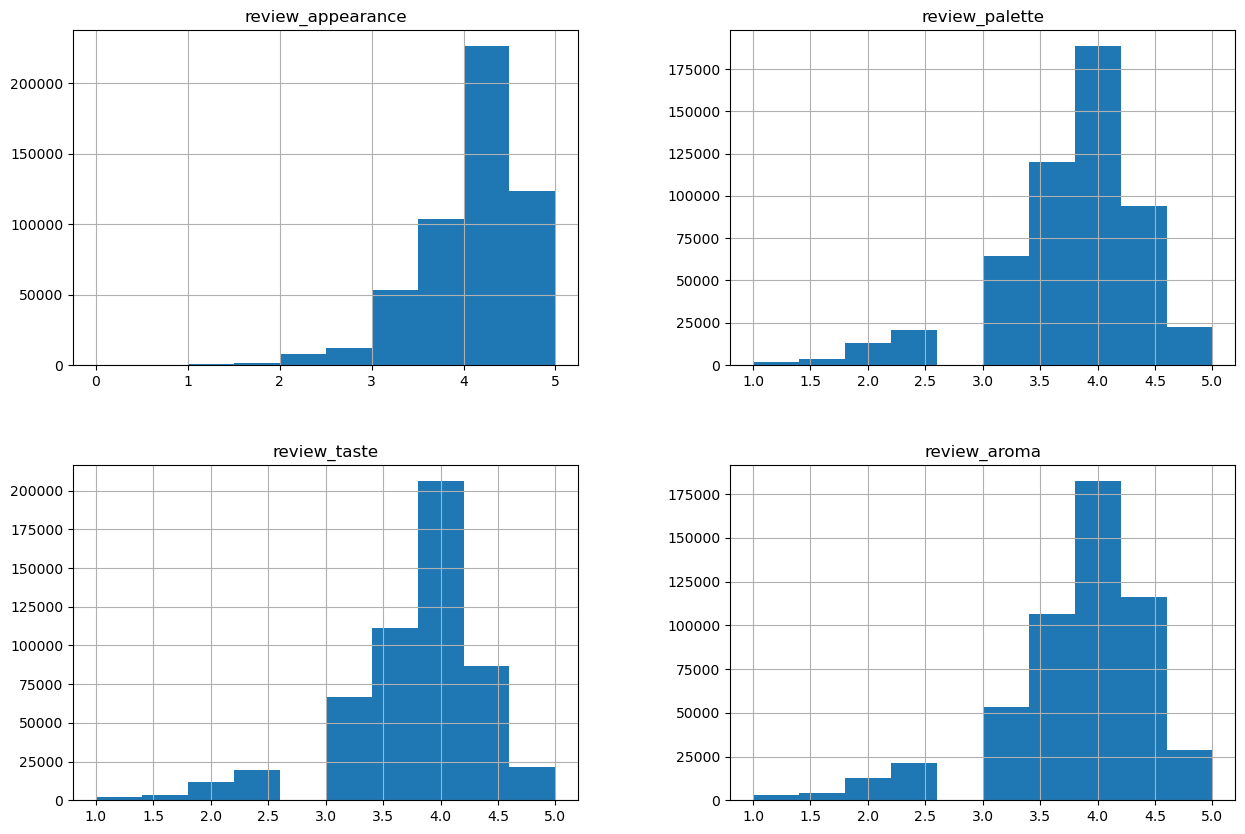

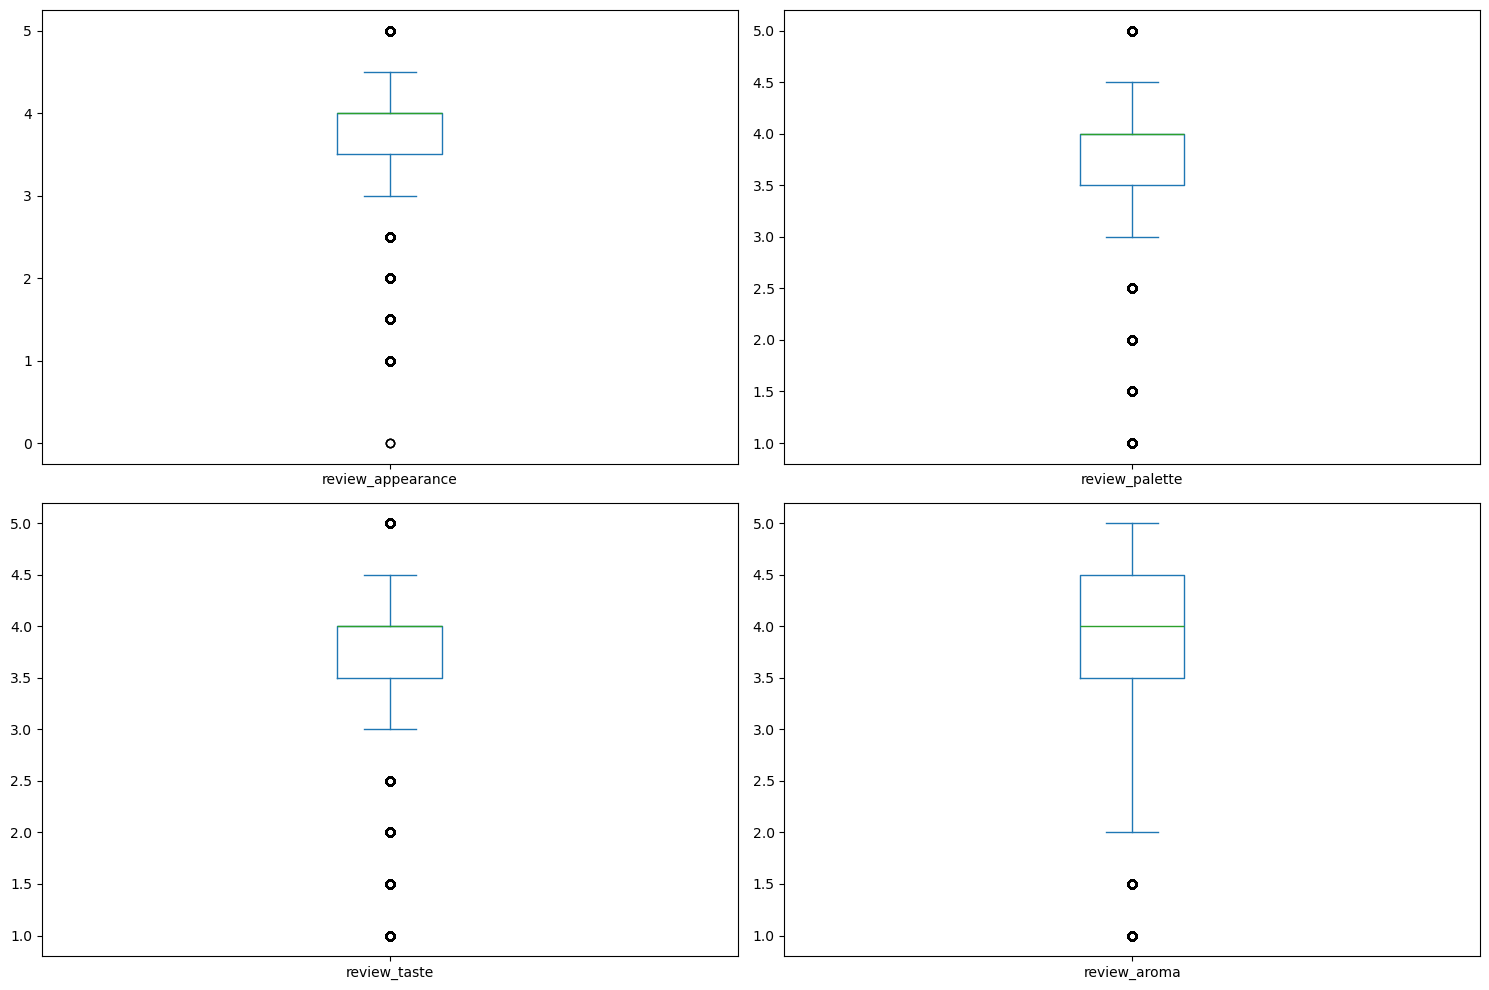

review_appearance    45331
review_palette       61761
review_taste         58051
review_aroma          7285
dtype: int64

In [5]:
# Histograms for review_appearance, review_palette, review_taste, review_aroma
df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']].hist(bins=10, figsize=(15, 10))
plt.show()

# Box Plots for review_appearance, review_palette, review_taste, review_aroma
df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 10))
plt.tight_layout()
plt.show()

# Outlier Detection using IQR for review_appearance, review_palette, review_taste, review_aroma
Q1 = df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']].quantile(0.25)
Q3 = df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']] < (Q1 - 1.5 * IQR)) | 
            (df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']] > (Q3 + 1.5 * IQR))).sum()

outliers

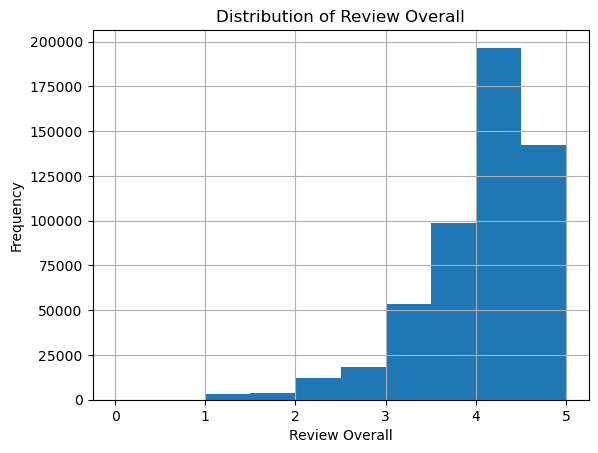

In [6]:
df['review_overall'].hist(bins=10)
plt.title('Distribution of Review Overall')
plt.xlabel('Review Overall')
plt.ylabel('Frequency')
plt.show()

### Correlation of beer features

In [7]:
corr_matrix = df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma', 'review_overall']].corr()


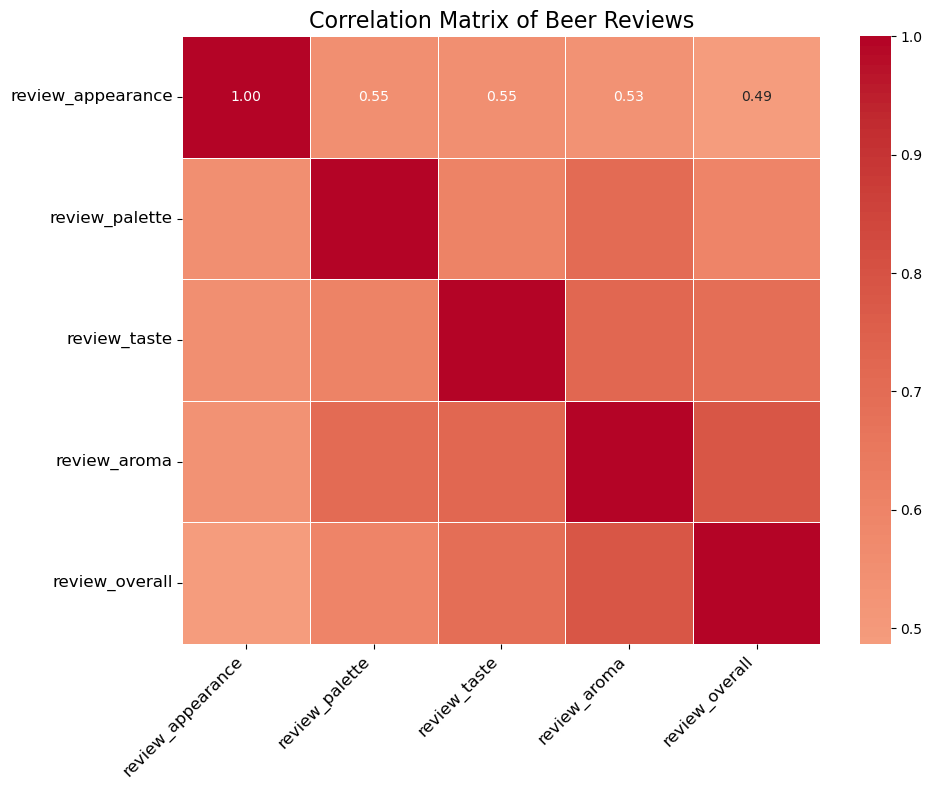

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

# Customize the title and axis labels
plt.title('Correlation Matrix of Beer Reviews', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Show how much beer features are effected by the others

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['review_appearance', 'review_palette', 'review_taste', 'review_aroma']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

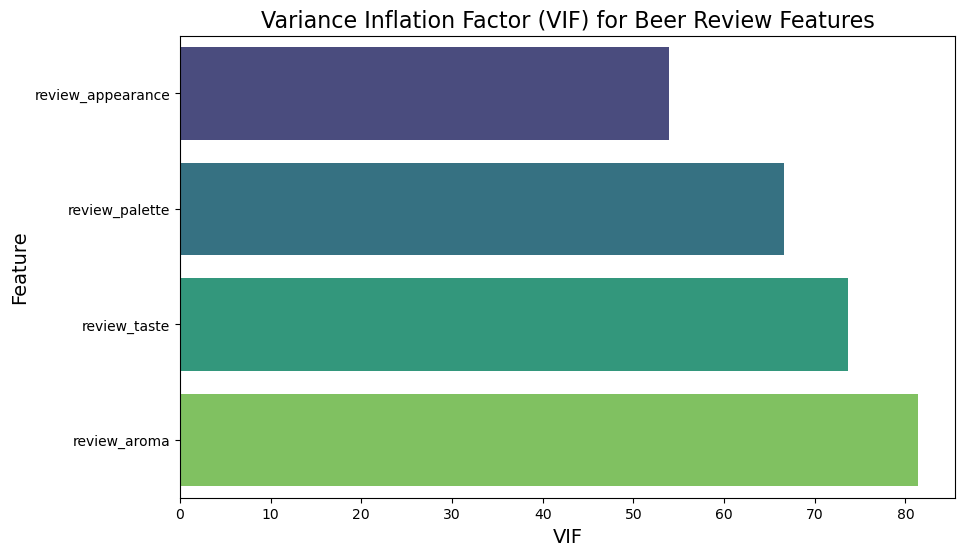

In [10]:
# Plotting the VIF data
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Beer Review Features', fontsize=16)
plt.xlabel('VIF', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

In [11]:
# Basic Text Statistics
df['word_count'] = df['processed_review_text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['processed_review_text'].apply(lambda x: len(str(x)))
df['avg_word_length'] = df['processed_review_text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

In [12]:
df['word_count']

0          23
1          37
2          41
3          44
4         113
         ... 
528865     62
528866     27
528867     77
528868     55
528869     45
Name: word_count, Length: 528870, dtype: int64

In [13]:
df['char_count']

0         147
1         236
2         267
3         265
4         778
         ... 
528865    416
528866    176
528867    459
528868    327
528869    310
Name: char_count, Length: 528870, dtype: int64

In [14]:
df['avg_word_length']

0         5.434783
1         5.405405
2         5.536585
3         5.045455
4         5.893805
            ...   
528865    5.725806
528866    5.555556
528867    4.974026
528868    4.963636
528869    5.911111
Name: avg_word_length, Length: 528870, dtype: float64

C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


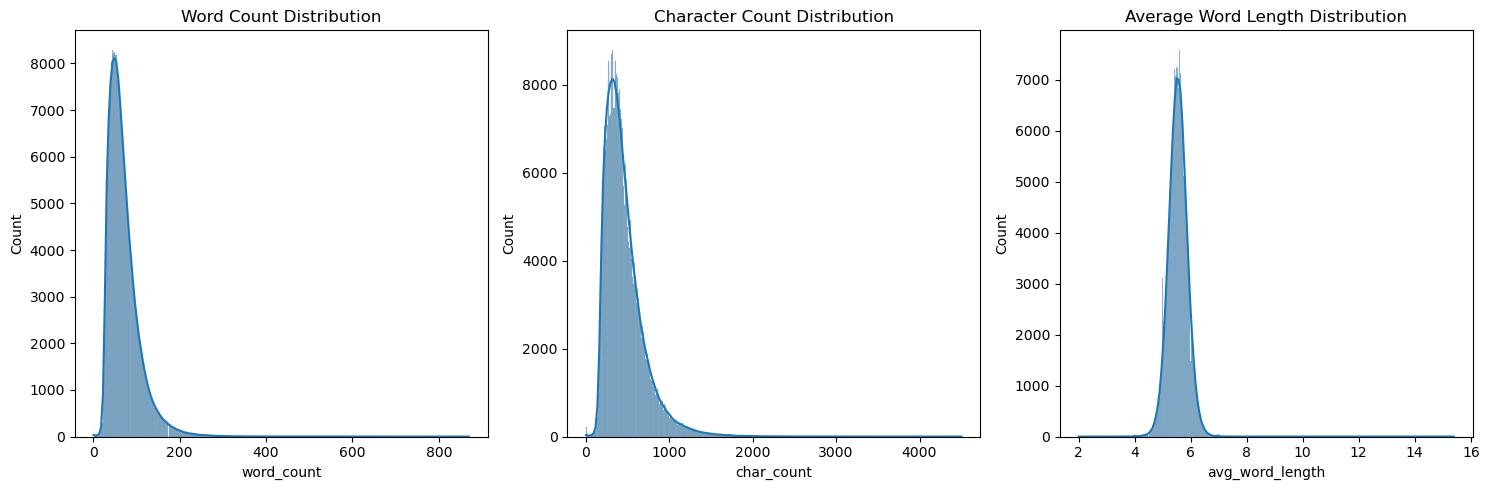

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['word_count'], ax=axes[0], kde=True)
axes[0].set_title('Word Count Distribution')

sns.histplot(df['char_count'], ax=axes[1], kde=True)
axes[1].set_title('Character Count Distribution')

sns.histplot(df['avg_word_length'], ax=axes[2], kde=True)
axes[2].set_title('Average Word Length Distribution')

plt.tight_layout()
plt.show()

                 word_count  char_count  avg_word_length
word_count         1.000000    0.995021         0.074058
char_count         0.995021    1.000000         0.159796
avg_word_length    0.074058    0.159796         1.000000


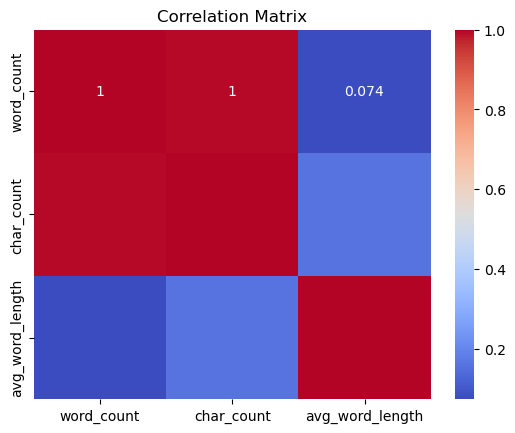

In [16]:
# Compute correlation matrix
correlation_matrix = df[['word_count', 'char_count', 'avg_word_length']].corr()
print(correlation_matrix)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.head()

,Unnamed: 0,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,cleaned_review_text,processed_review_text,word_count,char_count,avg_word_length
0,0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,a lot of foam but a lot in the smell some bana...,lot foam lot smell banana lactic tart good sta...,23,147,5.434783
1,1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,dark red color light beige foam average in the...,dark red color light beige foam average smell ...,37,236,5.405405
2,2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,almost totally black beige foam quite compact ...,almost totally black beige foam quite compact ...,41,267,5.536585
3,3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,golden yellow color white compact foam quite c...,golden yellow color white compact foam quite c...,44,265,5.045455
4,4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,according to the website the style for the cal...,according website style caldera cauldron chang...,113,778,5.893805


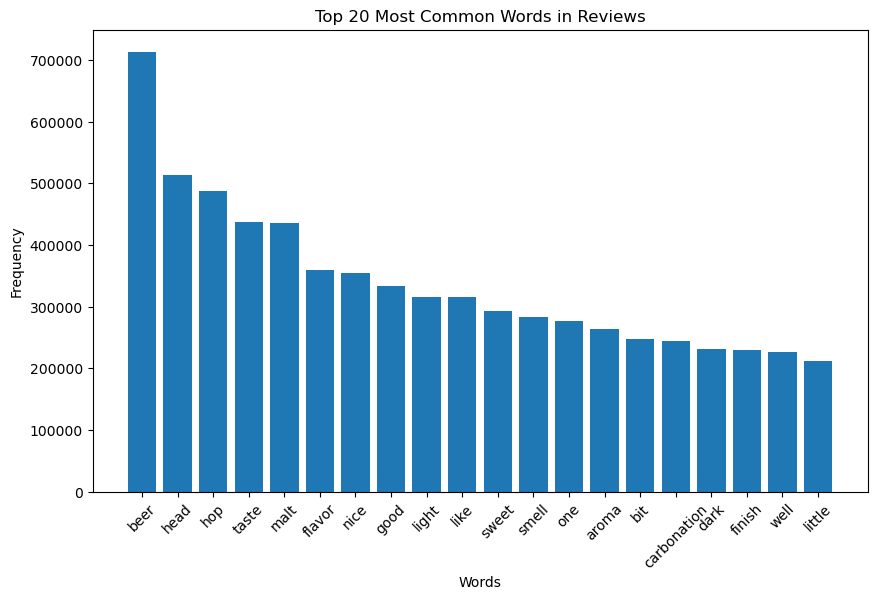

In [21]:
from collections import Counter

# Flatten all reviews into a single list of words
all_words = ' '.join(df['processed_review_text']).split()

# Get the most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot word frequencies
words, frequencies = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Reduce the number of features
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df['processed_review_text'])

# Get feature names
bigrams = vectorizer.get_feature_names_out()

# Calculate bigram counts directly from the sparse matrix
bigram_counts = np.asarray(X.sum(axis=0)).flatten()

# Create a DataFrame for bigrams
bigram_df = pd.DataFrame({'bigram': bigrams, 'count': bigram_counts}).sort_values(by='count', ascending=False).head(20)

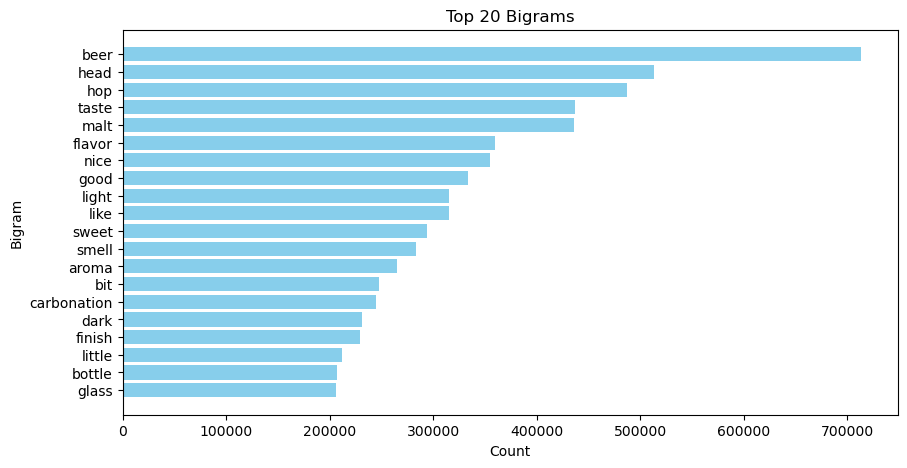

In [24]:
# Ensure bigram_df is sorted and limited to the top 20 bigrams
bigram_df = bigram_df.sort_values(by='count', ascending=False).head(20)

# Plot the top 20 bigrams
plt.figure(figsize=(10, 5))
plt.barh(bigram_df['bigram'], bigram_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Top 20 Bigrams')
plt.gca().invert_yaxis()
plt.show()

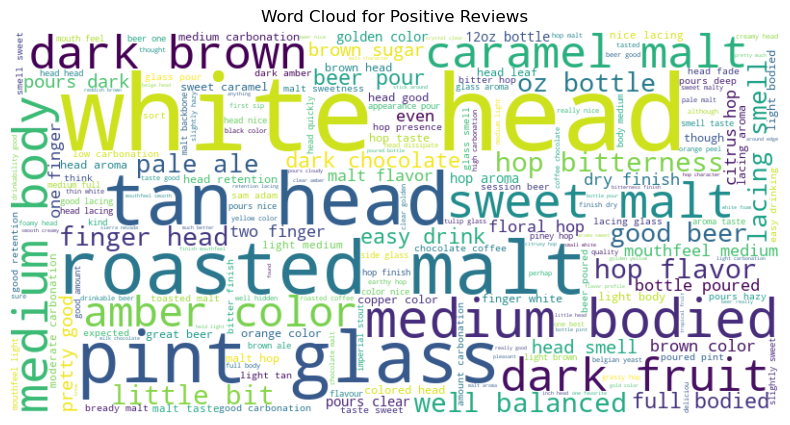

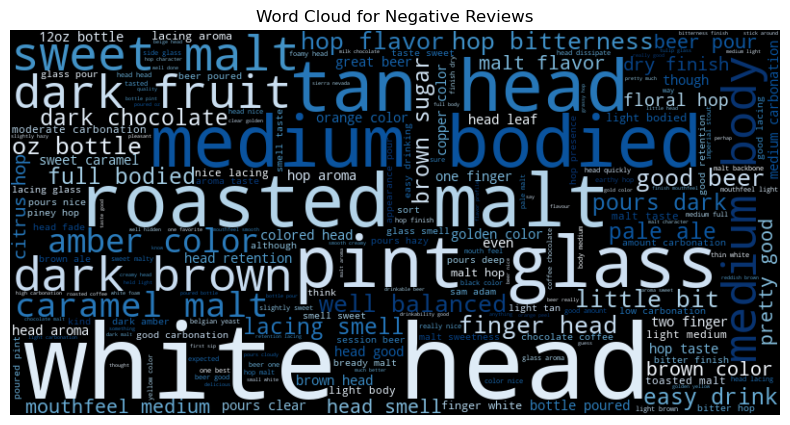

In [25]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] > 0]['processed_review_text'])
negative_reviews = ' '.join(df[df['sentiment'] <= 0]['processed_review_text'])

# Positive reviews word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Negative reviews word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

### Top beer types reviewed

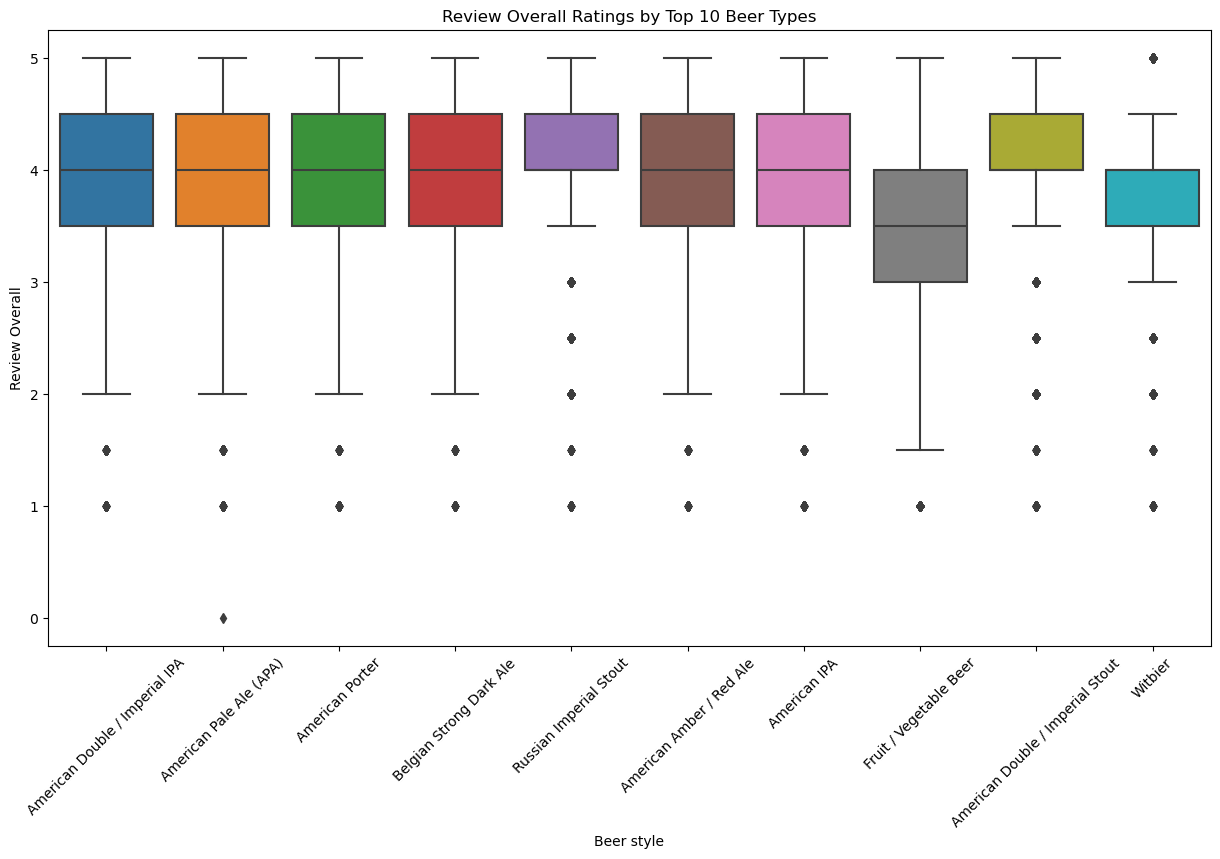

In [30]:
# Get top 10 most common beer types
top_beer_types = df['beer_style'].value_counts().head(10).index

# Filter DataFrame for these top beer types
top_beer_df = df[df['beer_style'].isin(top_beer_types)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='beer_style', y='review_overall', data=top_beer_df)
plt.title('Review Overall Ratings by Top 10 Beer Types')
plt.xlabel('Beer style')
plt.ylabel('Review Overall')
plt.xticks(rotation=45)
plt.show()

C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


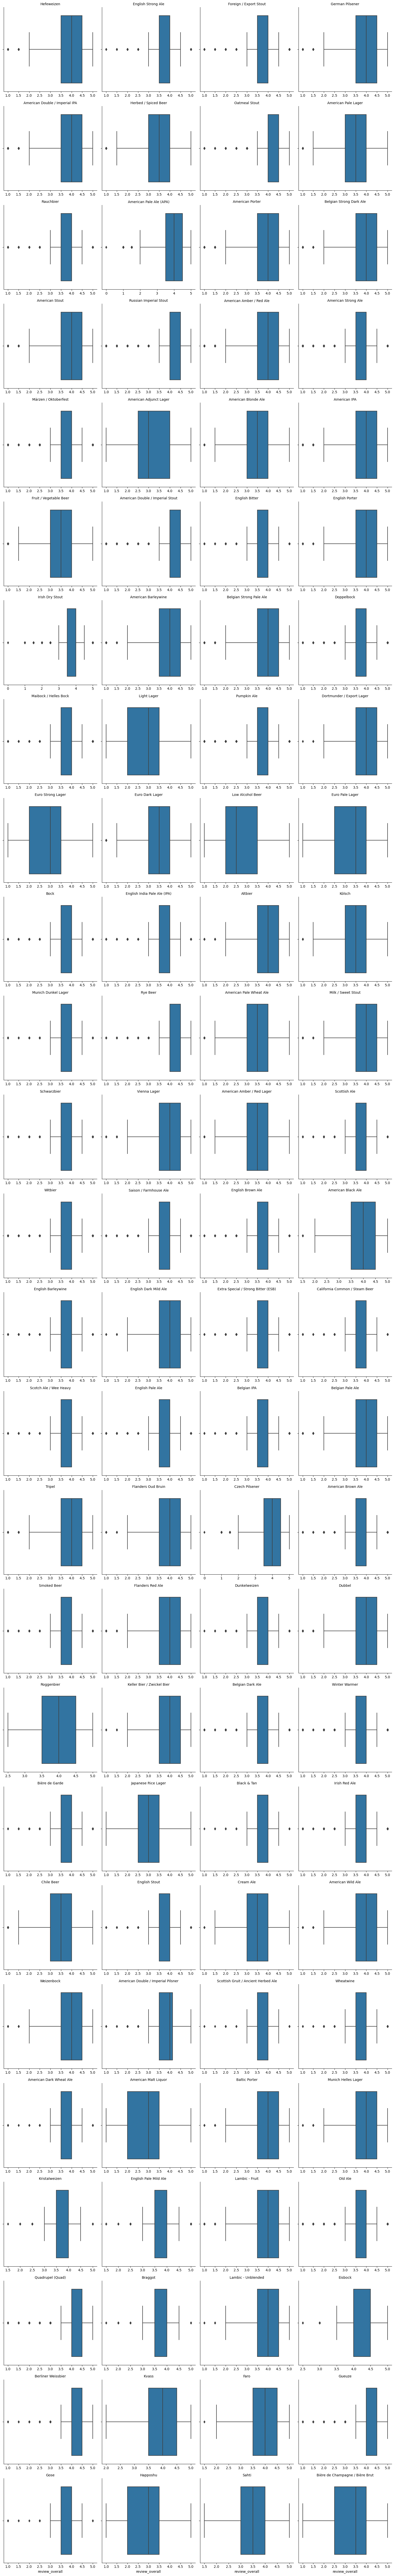

In [31]:
g = sns.FacetGrid(df, col="beer_style", col_wrap=4, height=4, sharex=False, sharey=True)
g.map(sns.boxplot, "review_overall")
g.set_titles("{col_name}")
plt.show()